<a href="https://colab.research.google.com/github/lowyuyao28/Predictive_Marketing_Customer_Segmentation/blob/main/Predictive_Marketing_K_Means_Clustering_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering & PCA**

In this project, the objective is to categorize customers type based on their purchase behaviour. Customer segmentation may help businesses in predictive marketing by clustering customers that have similar demands or respond similarly to particular marketing activity.

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github Project/Predictive Marketing : Customer Segmentation/ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
#Check if there is NULL value
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [7]:
# Replace NULL value
for col in df.columns:
  if df[col].dtypes == 'float64':
    df[col].fillna(-1,inplace=True)

In [8]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

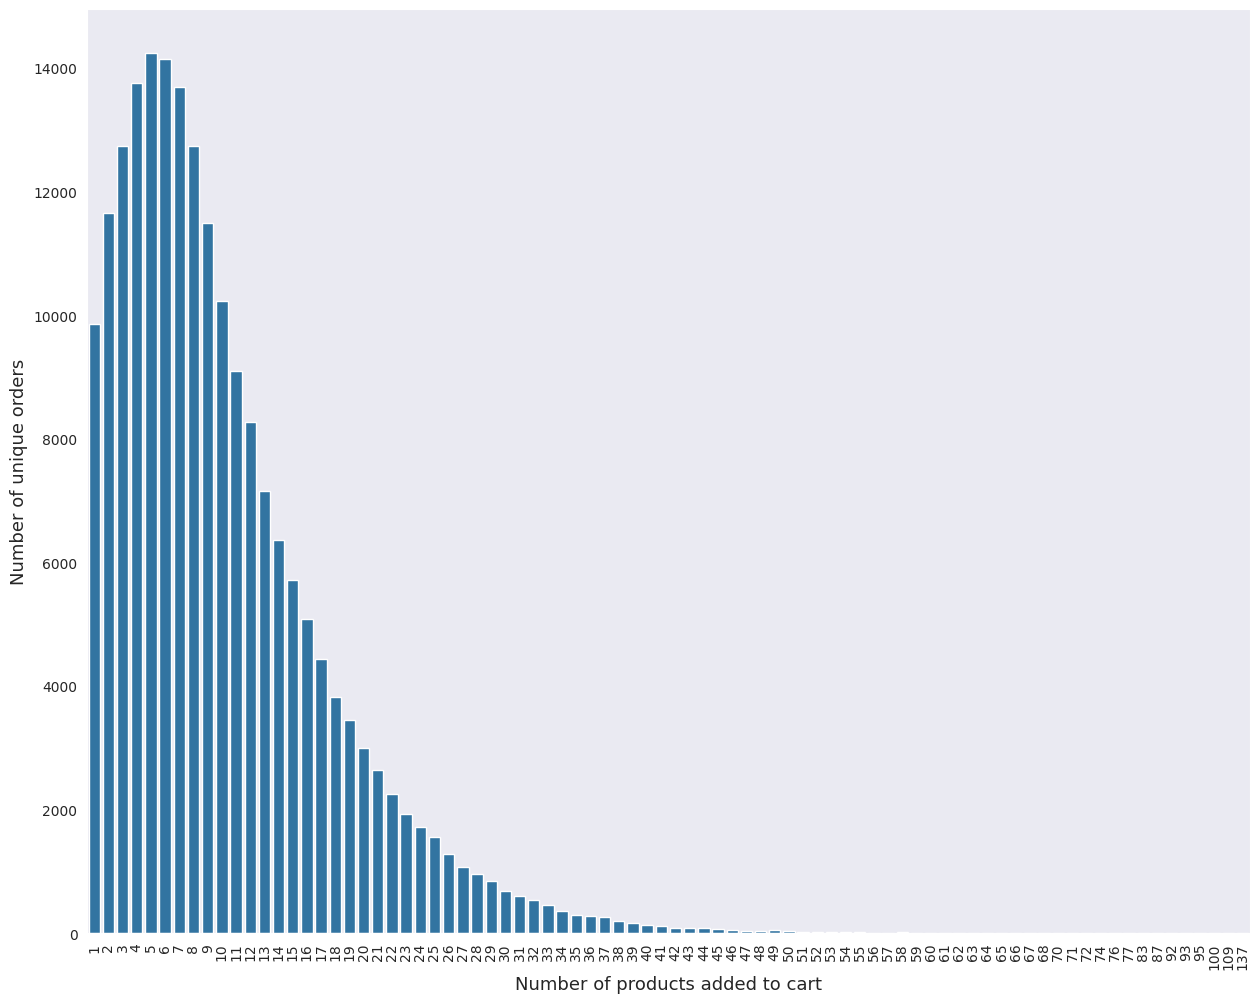

In [9]:
grouped = df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
sns.color_palette('husl', 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

In [10]:
# List the top 15 products purchased by customers
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


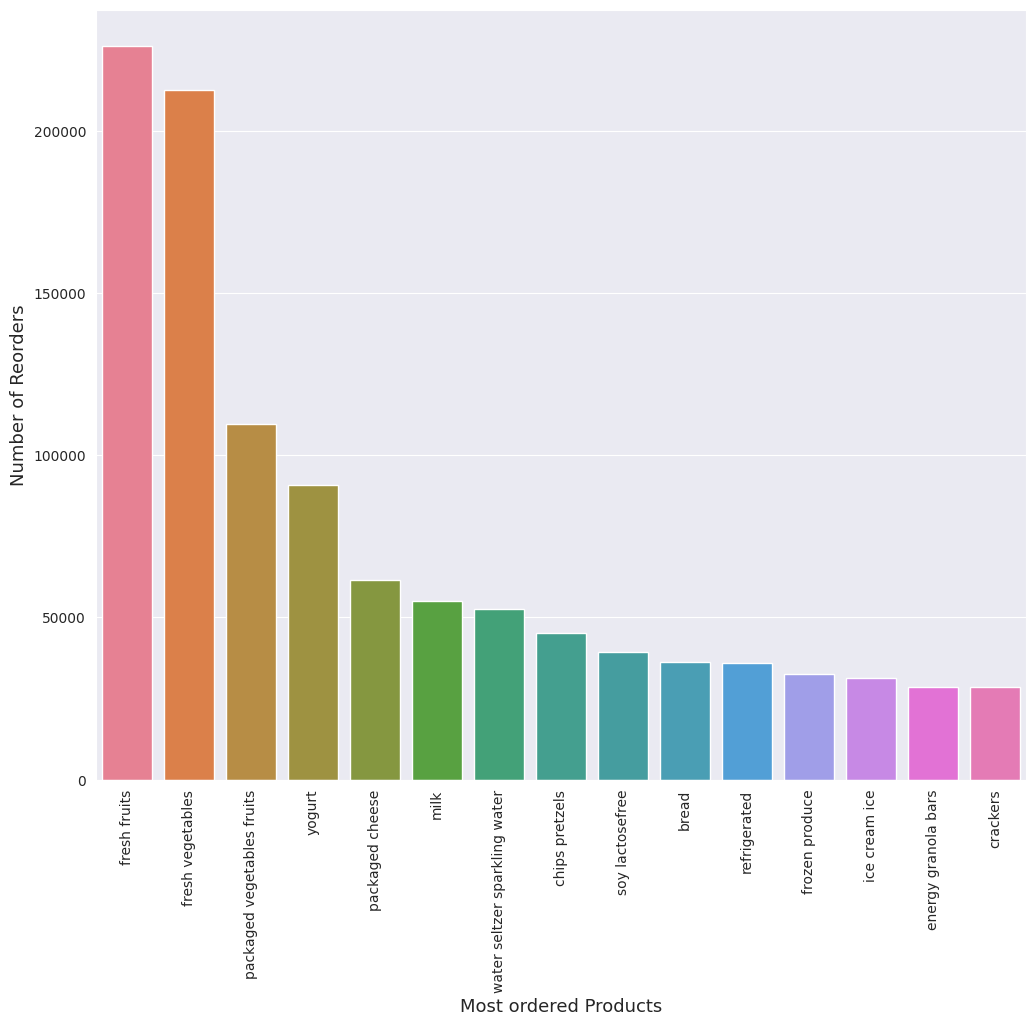

In [11]:
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, palette='husl')
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

In [12]:
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


# **Model Building**

In [13]:
from sklearn.cluster import KMeans, k_means
X_train = clst_prd.values

model = KMeans(n_clusters=6, random_state=540)
model = model.fit(X_train)

In [14]:
model.inertia_

4996208.594400611

In [15]:
# Try with different number of clusters to get better output
no_of_clusters = range(2,10)
inertia = []

for i in no_of_clusters:
    model = KMeans(n_clusters=i, random_state=540)
    model = model.fit(X_train)
    u = model.inertia_
    inertia.append(u)
    print("The inertia for :", i , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543563.615122272
The inertia for : 3 Cluster is :  6284972.256276751
The inertia for : 4 Cluster is :  5731867.711694658
The inertia for : 5 Cluster is :  5281366.432549876
The inertia for : 6 Cluster is :  4996208.594400611
The inertia for : 7 Cluster is :  4763202.309826419
The inertia for : 8 Cluster is :  4586277.708068137
The inertia for : 9 Cluster is :  4436403.4116696315


Text(0.5, 1.0, 'Inertia Plot per k')

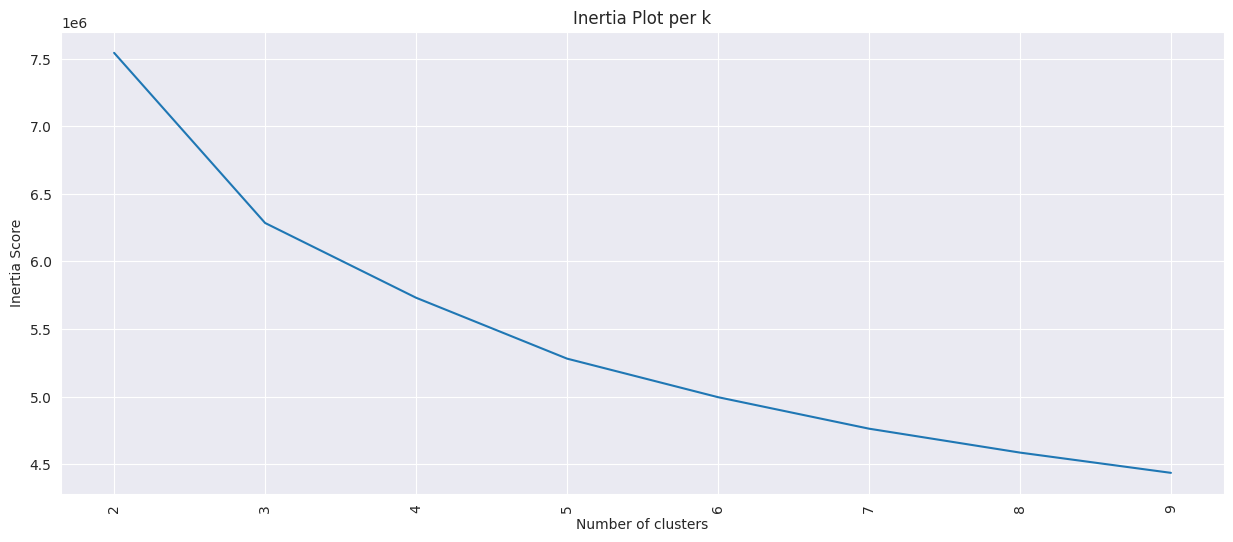

In [16]:
# Plot graph to find the optimal cluster number 'Elbow Method'
fig, (ax1) = plt.subplots(1, figsize =(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

There is an obvious change when number of clusters=5.

Let's try to run model with n_clusters=5

In [17]:
model = KMeans(n_clusters=5, random_state=42)
model = model.fit(X_train)
model.labels_

array([2, 4, 2, ..., 2, 4, 2], dtype=int32)

In [18]:
pred = model.predict(X_train)

In [19]:
unique , counts = np.unique(pred, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,6215,8075,62596,1932,26455


Let's try method PCA(Principal Component Analysis) to further improve the model.

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 640x480 with 0 Axes>

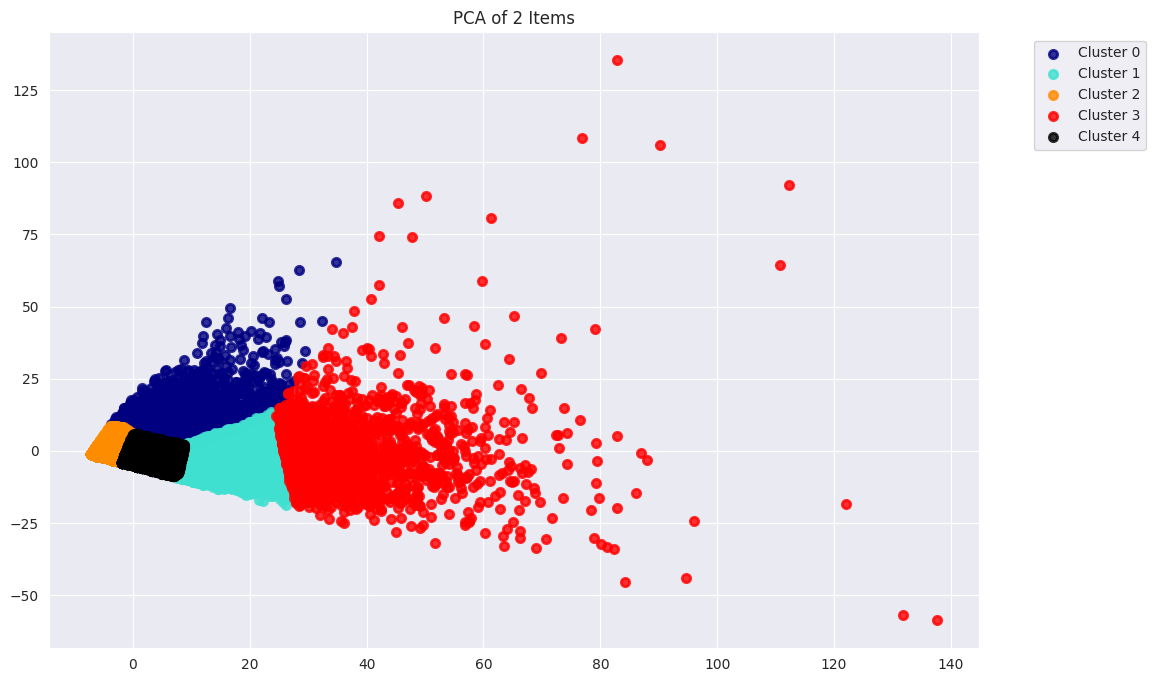

In [20]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca_model = PCA(n_components=2, random_state = 42)
X_r = pca_model.fit(X_train).transform(X_train)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca_model.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[pred == i, 0], X_r[pred == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

In [21]:
X_train.shape

(105273, 21)

Total Variance in our dataset is:  113.18063996195707
The 95% variance we want to have is:  107.52160796385921

Variance explain with 4 n_compononets:  95.01640082451154
Variance explain with 8 n_compononets:  105.33440036554843
Variance explain with 9 n_compononets:  106.69075586909085
Variance explain with 10 n_compononets:  107.98339847734053
Variance explain with 15 n_compononets:  112.05606051805343
Variance explain with 18 n_compononets:  113.05270297347111
Variance explain with 21 n_compononets:  113.18063996195707


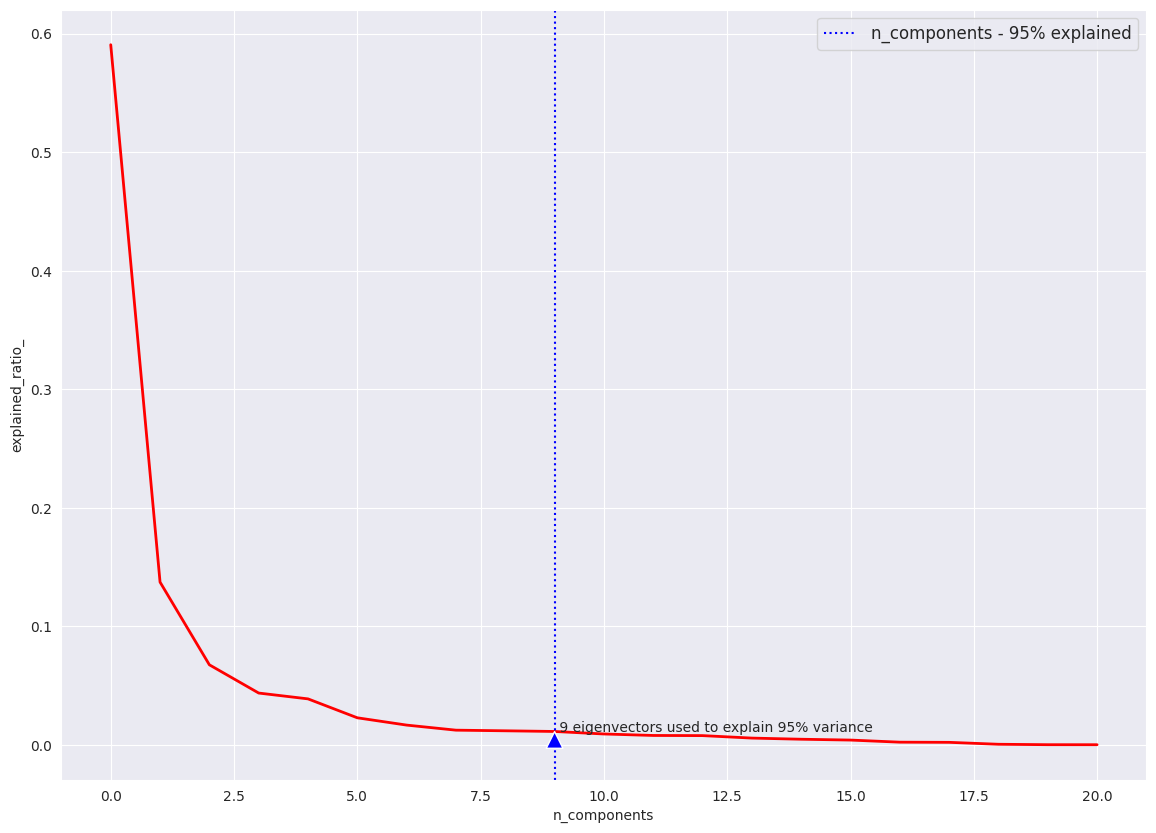

In [22]:
# IDENTIFY THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X_train.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X_train).transform(X_train)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# PLOTTING LINE WITH 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]),
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 6860370.373493595
The innertia for : 3 Clusters is: 5601874.03645682
The innertia for : 4 Clusters is: 5048851.9179191645
The innertia for : 5 Clusters is: 4598343.436213519
The innertia for : 6 Clusters is: 4313269.845763275
The innertia for : 7 Clusters is: 4080311.6976780295
The innertia for : 8 Clusters is: 3903531.824333258
The innertia for : 9 Clusters is: 3752599.3219558275


Text(0.5, 1.0, 'Inertia Plot per k')

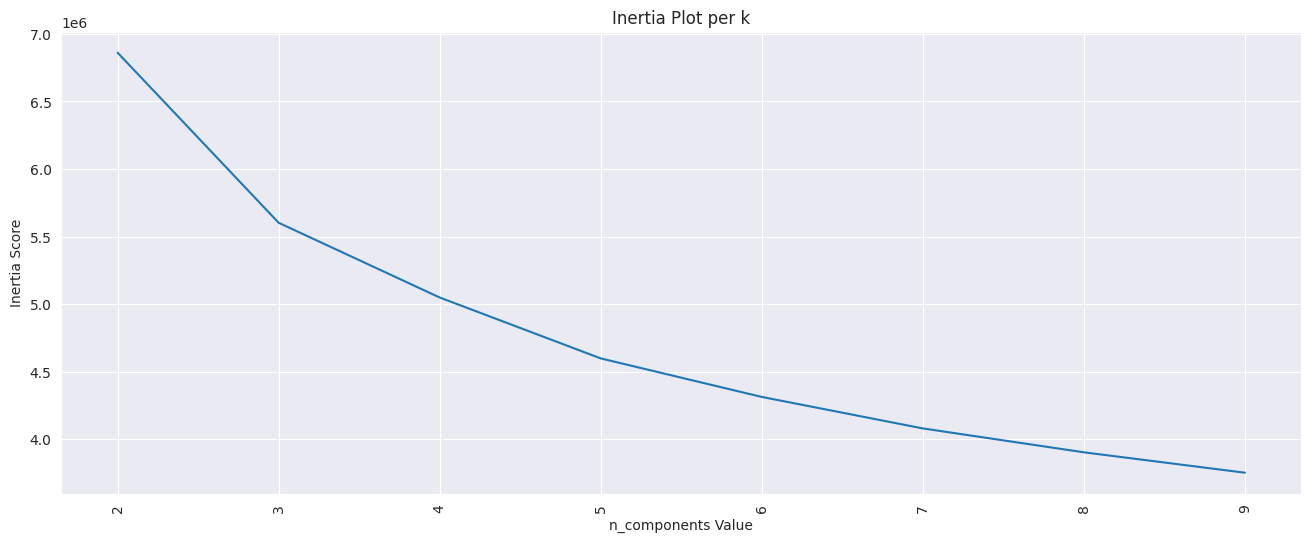

In [23]:
# RUNNING PCA AGAIN WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state = 42)
X_r = pca.fit(X_train).transform(X_train)

inertia = []

# RUNNING K-MEANS
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [24]:
## FINAL STEP:

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=42)
X_r = pca.fit(X_train).transform(X_train)

# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
clst_prd['clusters'] = clusters

# CREATING A CLUSTER CATERGORY
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,0,Cluster 1
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,3,Cluster 4
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,0,Cluster 1
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,0,Cluster 1
